# Task 6 

# Decision Tree Classifier

### Pravart Srivastava

### Importing Modules

In [239]:
import seaborn as sns
import matplotlib.pyplot
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

In [240]:
Iris = load_iris()

In [241]:
Iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [242]:
Iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Data Description

In [244]:
Iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [245]:
Dataset = pd.DataFrame(Iris.data, columns = Iris.feature_names)

In [252]:
print(">>> Dataset Information <<<\n")
Dataset.info()

>>> Dataset Information <<<

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [253]:
print(">>> Data Types <<<")
Dataset.dtypes

>>> Data Types <<<


sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [217]:
Dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [254]:
Dataset.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


### Heatmap

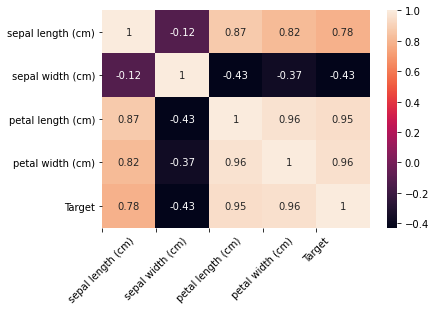

In [273]:
Dataset['Target'] = Iris.target
sns.heatmap(Dataset.corr(),annot = True)
plt.xticks(range(len(Dataset.columns)),Dataset.columns, rotation = 45);

In [262]:
X = Dataset.drop('Target' , axis = 1)
Y = Dataset['Target']

## Training 

In [263]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.45)

In [264]:
DTree = DecisionTreeClassifier()
DTree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [265]:
Prediction = DTree.predict(X_test)

In [266]:
print("\t\t\t>>> Classification Report <<<\n\n", classification_report(Y_test, Prediction))

			>>> Classification Report <<<

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.84      0.91        25
           2       0.86      1.00      0.92        24

    accuracy                           0.94        68
   macro avg       0.95      0.95      0.95        68
weighted avg       0.95      0.94      0.94        68



In [267]:
print(">>> Confusion Matrix <<<\n\n", confusion_matrix(Y_test, Prediction))

>>> Confusion Matrix <<<

 [[19  0  0]
 [ 0 21  4]
 [ 0  0 24]]


# Dataset Correlation Analysis

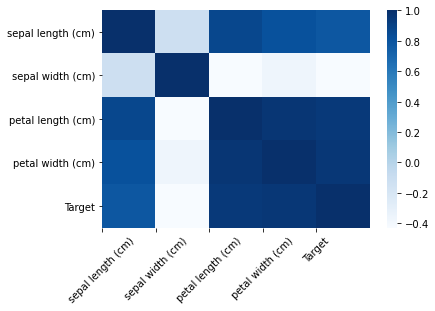

In [274]:
sns.heatmap(Dataset.corr(), cma p= "Blues")
plt.xticks(range(len(Dataset.columns)),Dataset.columns, rotation = 45);

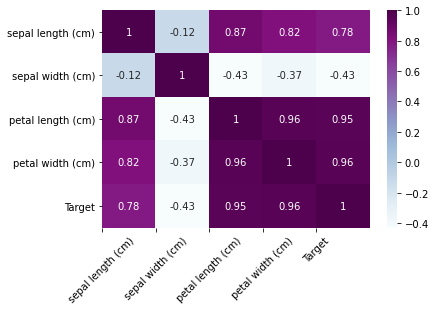

In [275]:
correlation_matrix= Dataset.corr().round(2)
sns.heatmap(data=correlation_matrix, cmap = "BuPu", annot =True)
plt.xticks(range(len(Dataset.columns)),Dataset.columns, rotation = 45);

# Decision Tree

In [235]:
from sklearn import tree
import matplotlib.pyplot as plt

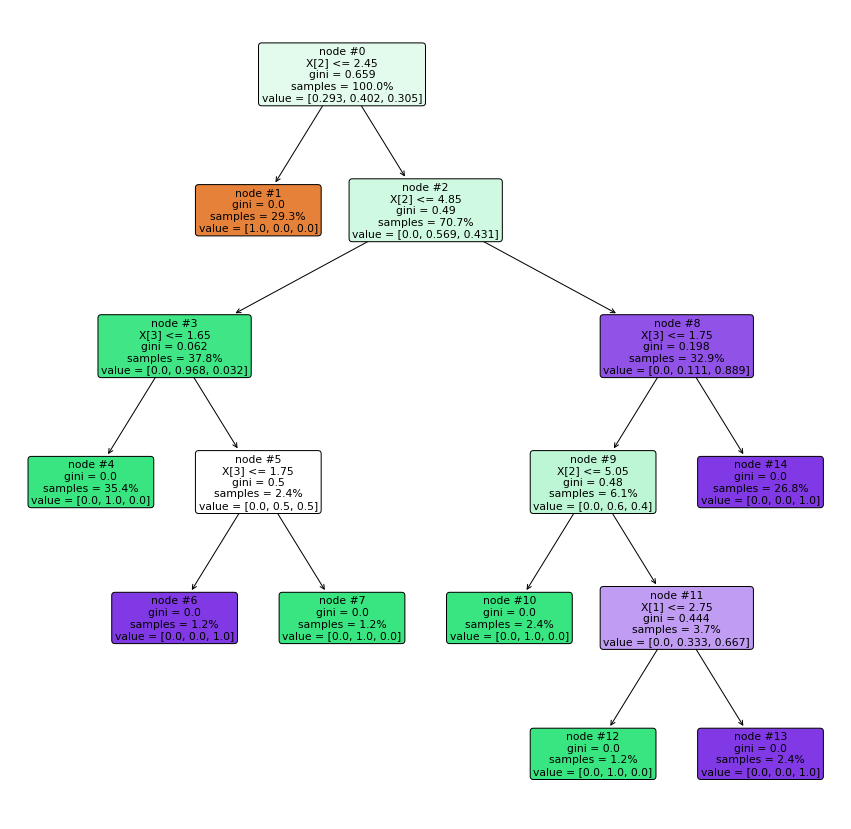

In [236]:
Fnames = ['Sepal Length(cm)', 'Sepal Width(cm)', 'Petal Length(cm)', 'Petal Width(cm)',]
Class = ['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica']

plt.figure(figsize=(15,15))
tree.plot_tree(DTree, filled = True, proportion = True, node_ids= True, rounded= True);

# Model Accuracy

In [232]:
print ("Accuracy of Model: ", metrics.accuracy_score(Y_test,Prediction))

Accuracy of Model:  0.9411764705882353


# Thank You
   ### Pravart Srivastava